# Objective

* Explore data relationship between demographic/location factors and online food ordering behavior. 
* Analyze customer feedback to improve service quality  
* predict customer preferences or behavior based on other attributes


In [90]:
# Import necessary libraries to read and clean data
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#Import imputer to imput missing data
from sklearn.impute import SimpleImputer

#Import encoder to encode categorical data
from sklearn.preprocessing import LabelEncoder

## Data Analysis

In [169]:
raw_df = pd.read_csv('onlinefoods.csv')
raw_df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [175]:
raw_df['Feedback'].unique()

array(['Positive', 'Negative '], dtype=object)

In [113]:
#copy data to not overwrite original data
df = raw_df.copy()

In [114]:
df.shape

(388, 13)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


From above seem like they are no missing value and with 388 non-null. Output is the current status of ordering

In [116]:
df.nunique()

Age                           16
Gender                         2
Marital Status                 3
Occupation                     4
Monthly Income                 5
Educational Qualifications     5
Family size                    6
latitude                      77
longitude                     76
Pin code                      77
Output                         2
Feedback                       2
Unnamed: 12                    2
dtype: int64

In [117]:
# we can drop the Unnamed columns because we do not know how what are that columns for
df = df.drop(columns='Unnamed: 12')
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback'],
      dtype='object')

In [118]:
#check duplicate data
df[df.duplicated()]

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
43,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive
48,23,Female,Single,Student,No Income,Graduate,3,12.9820,77.6256,560008,Yes,Negative
49,22,Female,Single,Student,10001 to 25000,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive
52,24,Male,Single,Student,No Income,Post Graduate,3,12.9770,77.5773,560009,Yes,Positive
60,23,Male,Single,Student,No Income,Post Graduate,5,12.8988,77.5764,560078,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
382,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,Yes,Positive
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive


In [119]:
103+285

388

In [120]:
#drop duplicate
df.drop_duplicates(inplace=True, keep='first')
df.shape

(285, 12)

In [121]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64

In [122]:
#numerical columns
num_col = df.select_dtypes(include=['int64','float64']).columns.tolist()

In [123]:
num_col

['Age', 'Family size', 'latitude', 'longitude', 'Pin code']

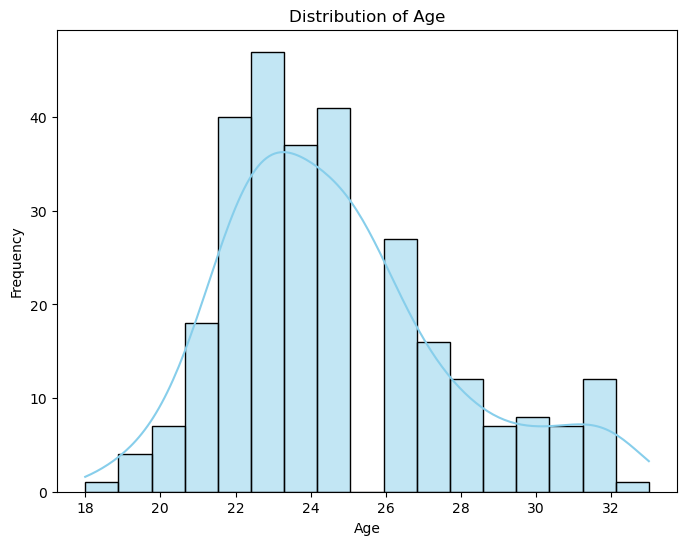

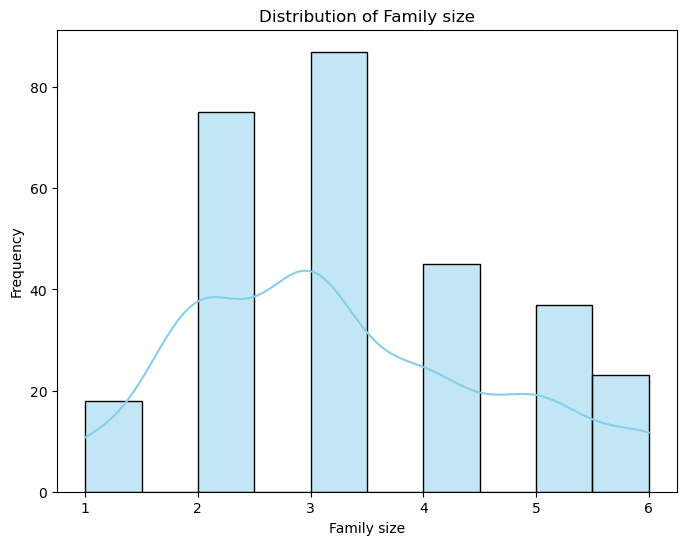

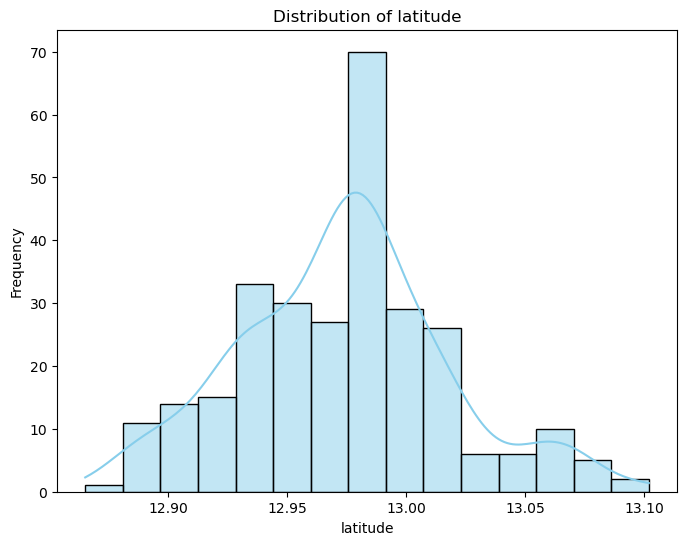

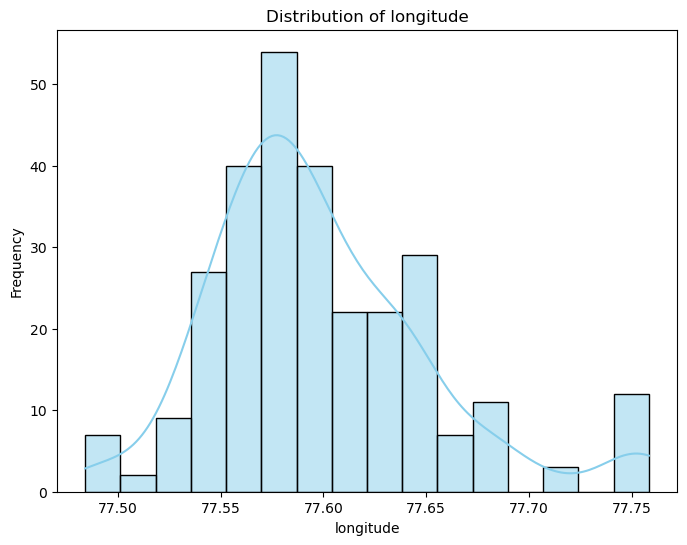

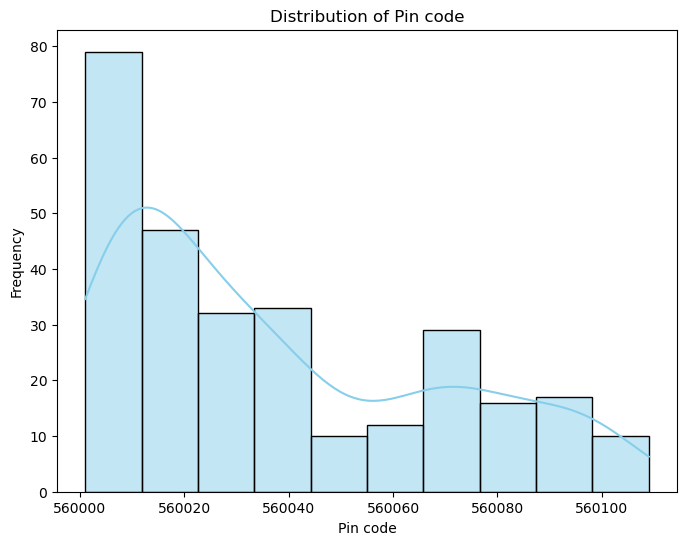

In [124]:
for col in num_col:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

From the above, distribution of family size, Pincode is not normally distribute. We can do log transformation on them. However, to keep is simple, I won't do log transformation

In [125]:
#df[num_col]

In [126]:
# df[num_col] = np.log(df[num_col])
# df[num_col]

In [127]:
# We do not have the missing value so we can just transform categorical to numerical
# check cat columns
cat_col = df.select_dtypes(include=['object']).columns.tolist()
cat_col

['Gender',
 'Marital Status',
 'Occupation',
 'Monthly Income',
 'Educational Qualifications',
 'Output',
 'Feedback']

In [128]:
#Apply label encoder to all categorical data
for col in cat_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [129]:
df['Pin code']

0      560001
1      560009
2      560017
3      560019
4      560010
        ...  
355    560046
363    560085
369    560095
374    560092
386    560009
Name: Pin code, Length: 285, dtype: int64

In [130]:
df['Pin code'] = np.log(df['Pin code'])

In [131]:
df['Pin code'] 

0      13.235694
1      13.235708
2      13.235722
3      13.235726
4      13.235710
         ...    
355    13.235774
363    13.235844
369    13.235862
374    13.235856
386    13.235708
Name: Pin code, Length: 285, dtype: float64

**Feedback is an output that we also need to encode to 0 for negative and 1 for positive.**

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 386
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         285 non-null    int64  
 1   Gender                      285 non-null    int64  
 2   Marital Status              285 non-null    int64  
 3   Occupation                  285 non-null    int64  
 4   Monthly Income              285 non-null    int64  
 5   Educational Qualifications  285 non-null    int64  
 6   Family size                 285 non-null    int64  
 7   latitude                    285 non-null    float64
 8   longitude                   285 non-null    float64
 9   Pin code                    285 non-null    float64
 10  Output                      285 non-null    int64  
 11  Feedback                    285 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.9 KB


In [138]:
df = df1.copy()

In [139]:
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,0,2,3,4,2,4,12.9766,77.5993,13.235694,1,1
1,24,0,2,3,2,0,3,12.9770,77.5773,13.235708,1,1
2,22,1,2,3,2,2,3,12.9551,77.6593,13.235722,1,0
3,22,0,2,3,4,0,6,12.9473,77.5616,13.235726,1,1
4,22,1,2,3,2,2,4,12.9850,77.5533,13.235710,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
355,21,1,2,3,4,0,2,13.0012,77.5995,13.235774,0,1
363,31,1,0,0,3,1,3,12.9306,77.5434,13.235844,1,1
369,30,1,0,0,3,2,6,12.9369,77.6407,13.235862,1,1
374,21,1,2,3,4,0,3,13.0641,77.5931,13.235856,1,0


In [140]:
df1 = df.copy()

In [141]:
df1 = df1.iloc[:,:-1]

In [142]:
#scale data to have the same scale with min max scaler
minmax = MinMaxScaler()
df1 = pd.DataFrame(minmax.fit_transform(df1), columns=df1.columns)
df1

<IPython.core.display.Javascript object>

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output
0,0.133333,0.0,1.0,1.0,1.00,0.50,0.6,0.470439,0.420073,0.000000,1.0
1,0.400000,0.0,1.0,1.0,0.50,0.00,0.4,0.472128,0.339781,0.074081,1.0
2,0.266667,1.0,1.0,1.0,0.50,0.50,0.4,0.379645,0.639051,0.148160,1.0
3,0.266667,0.0,1.0,1.0,1.00,0.00,1.0,0.346706,0.282482,0.166680,1.0
4,0.266667,1.0,1.0,1.0,0.50,0.50,0.6,0.505912,0.252190,0.083341,1.0
...,...,...,...,...,...,...,...,...,...,...,...
280,0.200000,1.0,1.0,1.0,1.00,0.00,0.2,0.574324,0.420803,0.416690,0.0
281,0.866667,1.0,0.0,0.0,0.75,0.25,0.4,0.276182,0.216058,0.777794,1.0
282,0.800000,1.0,0.0,0.0,0.75,0.50,1.0,0.302787,0.571168,0.870381,1.0
283,0.200000,1.0,1.0,1.0,1.00,0.00,0.4,0.839949,0.397445,0.842605,1.0


In [144]:
df['Feedback'].unique()

array([1, 0])

In [145]:
# split data before ML modeling
from sklearn.model_selection import train_test_split
random_number = 1

X = df1
y = df['Feedback']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_number)

In [146]:
X_train

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output
8,0.333333,0.0,1.0,1.000000,1.0,0.5,0.2,0.470439,0.420073,0.000000,1.0
280,0.200000,1.0,1.0,1.000000,1.0,0.0,0.2,0.574324,0.420803,0.416690,0.0
204,0.400000,1.0,1.0,1.000000,1.0,0.5,0.2,0.445101,0.615693,0.685206,1.0
31,0.266667,1.0,1.0,1.000000,1.0,0.5,0.6,0.477618,0.571533,0.342614,1.0
161,0.266667,1.0,1.0,1.000000,1.0,0.0,0.2,0.522382,0.328102,0.175940,0.0
...,...,...,...,...,...,...,...,...,...,...,...
203,0.200000,0.0,1.0,1.000000,1.0,0.5,0.4,0.209882,0.289416,0.638911,1.0
255,0.333333,0.0,0.5,0.000000,0.0,0.0,0.6,0.167230,0.722263,0.324095,1.0
72,0.400000,1.0,1.0,1.000000,1.0,0.5,0.8,0.289274,0.386131,0.092601,1.0
235,0.333333,1.0,1.0,1.000000,1.0,0.5,0.4,0.555321,1.000000,0.611134,1.0


In [147]:
X_train.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output'],
      dtype='object')

In [148]:
X_test

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output
95,0.000000,1.0,1.0,1.000000,1.00,0.00,0.8,0.415118,0.357299,0.009260,1.0
110,0.466667,1.0,1.0,1.000000,1.00,0.50,0.6,0.472128,0.339781,0.074081,1.0
169,0.866667,0.0,0.0,0.000000,0.75,0.25,0.8,0.426520,0.447445,0.222239,1.0
205,0.533333,0.0,0.0,0.666667,0.00,0.00,0.8,0.445101,0.615693,0.685206,0.0
262,0.466667,0.0,1.0,1.000000,0.00,0.00,0.2,0.466639,0.271533,0.203719,1.0
...,...,...,...,...,...,...,...,...,...,...,...
79,0.466667,1.0,1.0,1.000000,1.00,0.00,0.0,0.472128,0.339781,0.074081,1.0
270,0.466667,0.0,0.5,0.000000,0.25,0.50,0.4,0.560811,0.505474,0.037040,0.0
119,0.533333,0.0,1.0,0.000000,0.75,0.00,0.4,0.560811,0.505474,0.037040,1.0
266,0.600000,0.0,0.0,0.666667,0.75,0.00,1.0,0.879223,0.227007,0.120381,0.0


In [149]:
y_train.value_counts()

1    167
0     32
Name: Feedback, dtype: int64

In [150]:
#Data imbalance?

In [151]:
y_test.value_counts()

1    64
0    22
Name: Feedback, dtype: int64

## Build ML models. 


In [152]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=random_number)
param_grid_log = {
    'C': [100, 10, 1.0, 0.1, 0.01],
    'penalty': ['l1','l2'],
    'solver':['liblinear']
}

#Find best parameter model
grid_log = GridSearchCV(
        estimator=lr,
        param_grid=param_grid_log, 
        cv=5,
        n_jobs=-1,
        scoring='accuracy',
        verbose=0
    )
#fit best model to training
model_log = grid_log.fit(X_train, y_train)

<IPython.core.display.Javascript object>

In [153]:
model_log

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [154]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    random_state=random_number
)

param_grid_tree = {
    "max_depth": [3, 5, 7, 9, 11, 13],
    'criterion' : ["gini", "entropy"],
}

grid_tree = GridSearchCV(
        estimator=dt,
        param_grid=param_grid_tree, 
        cv=5,
        n_jobs=-1,
        scoring='accuracy',
        verbose=0
    )
model_tree = grid_tree.fit(X_train, y_train)

<IPython.core.display.Javascript object>

In [155]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=random_number)
param_grid_forest = {
    'n_estimators': [200,400, 700],
    'max_depth': [10,20,30],
    'criterion' : ["gini", "entropy"],
    'max_leaf_nodes': [50, 100]
}

grid_forest = GridSearchCV(
        estimator=rf,
        param_grid=param_grid_forest, 
        cv=5, 
        n_jobs=-1, 
        scoring='accuracy',
        verbose=0
    )
model_forest = grid_forest.fit(X_train, y_train)


<IPython.core.display.Javascript object>

In [156]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [157]:
print(xgb.__version__)

2.0.3


In [158]:
#Xgboost 
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=random_number)

# Parameters for XGBoost model
params = {
    'max_depth': [3, 5, 7, 9, 11, 13],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'objective': ['binary:logistic'],  # For binary classification
    'eval_metric': ['error']            # Evaluation metric
}

# Grid search cross-validation
grid_xgb = GridSearchCV(estimator=xgb_model,
                        param_grid=params,
                        cv=5,
                        n_jobs=-1,
                        scoring='accuracy',
                        verbose=0)

# Fit the model
model_xgb = grid_xgb.fit(X_train, y_train)

<IPython.core.display.Javascript object>

### Prediction

In [159]:
#prediction of each model on X_test
ylog_predict = model_log.predict(X_test)
ytree_predict = model_tree.predict(X_test)
yforest_predict = model_forest.predict(X_test)
yxgb_predict = model_xgb.predict(X_test)

### Metric

In [160]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, log_loss

In [161]:
# Model evelaution metrics
def eval_metrics(actual, pred):
    accuracy = metrics.accuracy_score(actual, pred)
    f1 = metrics.f1_score(actual, pred, pos_label=1)
    fpr, tpr, _ = metrics.roc_curve(actual, pred)
    auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, color='blue', label='ROC curve area = %0.2f'%auc)
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate', size=14)
    plt.ylabel('True Positive Rate', size=14)
    plt.legend(loc='lower right')
    #Save plot
    os.makedirs("plots", exist_ok=True)
    plt.savefig("plots/ROC_curve.png")
    #Close plot
    plt.close()
    return(f"accuracy = {accuracy}, f1 = {f1}, auc= {auc}")

In [162]:
print('logistic evaluations: ', eval_metrics(y_test, ylog_predict))
print('decision_tree evaluations: ',eval_metrics(y_test, ytree_predict))
print('random_forest evaluations: ',eval_metrics(y_test, yforest_predict))
print('Xgboost evaluations: ',eval_metrics(y_test, yxgb_predict))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

logistic evaluations:  accuracy = 0.813953488372093, f1 = 0.880597014925373, auc= 0.7109375


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

decision_tree evaluations:  accuracy = 0.813953488372093, f1 = 0.880597014925373, auc= 0.7109375


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

random_forest evaluations:  accuracy = 0.7209302325581395, f1 = 0.8356164383561643, auc= 0.4992897727272727


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Xgboost evaluations:  accuracy = 0.7674418604651163, f1 = 0.8591549295774649, auc= 0.5901988636363636


## Serialization and Deserialization

In [163]:
#serialization (save models)
import joblib

models = [model_log, model_tree, model_forest, model_xgb]
models_names = ['model_log', 'model_tree', 'model_forest', 'model_xgb']

#SAVE Each model with unique name
for model, name in zip(models, models_names):
    filename = f"{name}_v1.pkl"
    joblib.dump(model, filename)
    print(f"Save {name} as {filename}")

Save model_log as model_log_v1.pkl
Save model_tree as model_tree_v1.pkl
Save model_forest as model_forest_v1.pkl
Save model_xgb as model_xgb_v1.pkl


In [164]:
#deserialization (load model)
log_model = joblib.load('model_log_v1.pkl')

In [165]:
log_model

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [166]:
model_log

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

**Need to create test script on model file**, which is not in jupyter notebook. 
* Use pytest (.py) to test python code to confirm that model actually working. 
* IPython notebook contains all steps, we cannot use this in production environment because **it is difficult to debug, Require changes in multiple changes, Lots of dependencies, no modularity in the code, which can executed independently, conflict with variable and function, Duplicate Code snippets.**  
*Solution:   
- Write python script
- Follow Modular Programming
- Create Package

**Modular programming**  
- An approach where code is divided into separate files, where each file has everything necessary to execute a defined piece of logic. & return expected ouput when imported by other files for them

**Model**  
- A Python file that can hold function, class and variables

**Package**  
- One or more modules, such that they are interlink with each other
- Must contain *__init__.py* to treat as package

In [58]:
import sys
sys.path

['/Users/siriluk/Desktop/MLOps_Boostcamp/Packaging-ML-Model/Packaging_ML_Projects/Classification_online_food/Experiments',
 '/Users/siriluk/opt/anaconda3/lib/python39.zip',
 '/Users/siriluk/opt/anaconda3/lib/python3.9',
 '/Users/siriluk/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/siriluk/opt/anaconda3/lib/python3.9/site-packages',
 '/Users/siriluk/opt/anaconda3/lib/python3.9/site-packages/aeosa',
 '/Users/siriluk/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions',
 '/Users/siriluk/.ipython']

In [ ]:
sys.path.append("/path/to/folder")

In [3]:
# Check version of library that we use
import numpy as np
import pandas as pd
import joblib
import sklearn
import scipy
import setuptools
import wheel
import pytest

print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Joblib version:", joblib.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Scipy version:", scipy.__version__)
print("Setuptools version:", setuptools.__version__)
print("Wheel version:", wheel.__version__)
print("Pytest version:", pytest.__version__)

Numpy version: 1.26.4
Pandas version: 1.4.4
Joblib version: 1.1.0
Scikit-learn version: 1.0.2
Scipy version: 1.12.0
Setuptools version: 63.4.1
Wheel version: 0.37.1
Pytest version: 8.1.1


In [4]:
import xgboost as xgb
xgb.__version__

'2.0.3'

In [5]:
import matplotlib

print("Matplotlib version:", matplotlib.__version__)

Matplotlib version: 3.5.2


In [6]:
# Check version of library that we use
import numpy as np
import pandas as pd
import joblib
import sklearn
import scipy
import setuptools
import wheel
import pytest

print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Joblib version:", joblib.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Scipy version:", scipy.__version__)
print("Setuptools version:", setuptools.__version__)
print("Wheel version:", wheel.__version__)
print("Pytest version:", pytest.__version__)

Numpy version: 1.26.4
Pandas version: 1.4.4
Joblib version: 1.1.0
Scikit-learn version: 1.0.2
Scipy version: 1.12.0
Setuptools version: 63.4.1
Wheel version: 0.37.1
Pytest version: 8.1.1
